In [1]:
import pandas as pd
import numpy as np
import copy
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn.cluster import KMeans
from datetime import datetime
from datetime import date

In [2]:
two_year = pd.read_csv("C:/Users/sjaco/OneDrive/Desktop/final project/compas-scores-two-years.csv")

In [3]:
two_year.head()

,id,name,First,Last,compas_screening_date,sex,DateOfBirth,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,8/14/2013,Male,4/18/1947,69,Greater than 45,Other,...,1,Low,8/14/2013,7/7/2014,7/14/2014,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,1/27/2013,Male,1/22/1982,34,25 - 45,African-American,...,1,Low,1/27/2013,1/26/2013,2/5/2013,0,9,159,1,1
2,4,ed philo,ed,philo,4/14/2013,Male,5/14/1991,24,Less than 25,African-American,...,3,Low,4/14/2013,6/16/2013,6/16/2013,4,0,63,0,1
3,5,marcu brown,marcu,brown,1/13/2013,Male,1/21/1993,23,Less than 25,African-American,...,6,Medium,1/13/2013,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,3/26/2013,Male,1/22/1973,43,25 - 45,Other,...,1,Low,3/26/2013,NaN,NaN,2,0,1102,0,0


In [4]:
print(two_year.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   First                    7214 non-null   object 
 3   Last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   DateOfBirth              7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [5]:
cat_compas = two_year.select_dtypes(include=['object']).copy()

In [6]:
cat_compas.head()

,name,First,Last,compas_screening_date,sex,DateOfBirth,age_cat,race,c_jail_in,c_jail_out,...,vr_offense_date,vr_charge_desc,type_of_assessment,score_text,screening_date,v_type_of_assessment,v_score_text,v_screening_date,in_custody,out_custody
0,miguel hernandez,miguel,hernandez,8/14/2013,Male,4/18/1947,Greater than 45,Other,8/13/2013 6:03,8/14/2013 5:41,...,NaN,NaN,Risk of Recidivism,Low,8/14/2013,Risk of Violence,Low,8/14/2013,7/7/2014,7/14/2014
1,kevon dixon,kevon,dixon,1/27/2013,Male,1/22/1982,25 - 45,African-American,1/26/2013 3:45,2/5/2013 5:36,...,7/5/2013,Felony Battery (Dom Strang),Risk of Recidivism,Low,1/27/2013,Risk of Violence,Low,1/27/2013,1/26/2013,2/5/2013
2,ed philo,ed,philo,4/14/2013,Male,5/14/1991,Less than 25,African-American,4/13/2013 4:58,4/14/2013 7:02,...,NaN,NaN,Risk of Recidivism,Low,4/14/2013,Risk of Violence,Low,4/14/2013,6/16/2013,6/16/2013
3,marcu brown,marcu,brown,1/13/2013,Male,1/21/1993,Less than 25,African-American,NaN,NaN,...,NaN,NaN,Risk of Recidivism,High,1/13/2013,Risk of Violence,Medium,1/13/2013,NaN,NaN
4,bouthy pierrelouis,bouthy,pierrelouis,3/26/2013,Male,1/22/1973,25 - 45,Other,NaN,NaN,...,NaN,NaN,Risk of Recidivism,Low,3/26/2013,Risk of Violence,Low,3/26/2013,NaN,NaN


In [7]:
print(cat_compas.isnull().values.sum())

58779


In [8]:
print(cat_compas.isnull().sum())

name                        0
First                       0
Last                        0
compas_screening_date       0
sex                         0
DateOfBirth                 0
age_cat                     0
race                        0
c_jail_in                 307
c_jail_out                307
c_case_number              22
c_offense_date           1159
c_arrest_date            6077
c_charge_degree             0
c_charge_desc              29
r_case_number            3743
r_charge_degree          3743
r_offense_date           3743
r_charge_desc            3801
r_jail_in                4898
r_jail_out               4898
vr_case_number           6395
vr_charge_degree         6395
vr_offense_date          6395
vr_charge_desc           6395
type_of_assessment          0
score_text                  0
screening_date              0
v_type_of_assessment        0
v_score_text                0
v_screening_date            0
in_custody                236
out_custody               236
dtype: int

In [9]:
del cat_compas['c_arrest_date']
del cat_compas['vr_case_number']
del cat_compas['vr_charge_degree']
del cat_compas['vr_offense_date']
del cat_compas['vr_charge_desc']
del cat_compas['r_jail_out']
del cat_compas['r_jail_in']
del cat_compas['DateOfBirth']

In [10]:
print(cat_compas.isnull().sum())

name                        0
First                       0
Last                        0
compas_screening_date       0
sex                         0
age_cat                     0
race                        0
c_jail_in                 307
c_jail_out                307
c_case_number              22
c_offense_date           1159
c_charge_degree             0
c_charge_desc              29
r_case_number            3743
r_charge_degree          3743
r_offense_date           3743
r_charge_desc            3801
type_of_assessment          0
score_text                  0
screening_date              0
v_type_of_assessment        0
v_score_text                0
v_screening_date            0
in_custody                236
out_custody               236
dtype: int64


In [11]:
print(cat_compas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   7214 non-null   object
 1   First                  7214 non-null   object
 2   Last                   7214 non-null   object
 3   compas_screening_date  7214 non-null   object
 4   sex                    7214 non-null   object
 5   age_cat                7214 non-null   object
 6   race                   7214 non-null   object
 7   c_jail_in              6907 non-null   object
 8   c_jail_out             6907 non-null   object
 9   c_case_number          7192 non-null   object
 10  c_offense_date         6055 non-null   object
 11  c_charge_degree        7214 non-null   object
 12  c_charge_desc          7185 non-null   object
 13  r_case_number          3471 non-null   object
 14  r_charge_degree        3471 non-null   object
 15  r_offense_date       

In [12]:
cat_compas.head()

,name,First,Last,compas_screening_date,sex,age_cat,race,c_jail_in,c_jail_out,c_case_number,...,r_offense_date,r_charge_desc,type_of_assessment,score_text,screening_date,v_type_of_assessment,v_score_text,v_screening_date,in_custody,out_custody
0,miguel hernandez,miguel,hernandez,8/14/2013,Male,Greater than 45,Other,8/13/2013 6:03,8/14/2013 5:41,13011352CF10A,...,NaN,NaN,Risk of Recidivism,Low,8/14/2013,Risk of Violence,Low,8/14/2013,7/7/2014,7/14/2014
1,kevon dixon,kevon,dixon,1/27/2013,Male,25 - 45,African-American,1/26/2013 3:45,2/5/2013 5:36,13001275CF10A,...,7/5/2013,Felony Battery (Dom Strang),Risk of Recidivism,Low,1/27/2013,Risk of Violence,Low,1/27/2013,1/26/2013,2/5/2013
2,ed philo,ed,philo,4/14/2013,Male,Less than 25,African-American,4/13/2013 4:58,4/14/2013 7:02,13005330CF10A,...,6/16/2013,Driving Under The Influence,Risk of Recidivism,Low,4/14/2013,Risk of Violence,Low,4/14/2013,6/16/2013,6/16/2013
3,marcu brown,marcu,brown,1/13/2013,Male,Less than 25,African-American,NaN,NaN,13000570CF10A,...,NaN,NaN,Risk of Recidivism,High,1/13/2013,Risk of Violence,Medium,1/13/2013,NaN,NaN
4,bouthy pierrelouis,bouthy,pierrelouis,3/26/2013,Male,25 - 45,Other,NaN,NaN,12014130CF10A,...,NaN,NaN,Risk of Recidivism,Low,3/26/2013,Risk of Violence,Low,3/26/2013,NaN,NaN


In [13]:
del cat_compas['name']

#Now we fill the rest of the empty cells

In [14]:
print(cat_compas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   First                  7214 non-null   object
 1   Last                   7214 non-null   object
 2   compas_screening_date  7214 non-null   object
 3   sex                    7214 non-null   object
 4   age_cat                7214 non-null   object
 5   race                   7214 non-null   object
 6   c_jail_in              6907 non-null   object
 7   c_jail_out             6907 non-null   object
 8   c_case_number          7192 non-null   object
 9   c_offense_date         6055 non-null   object
 10  c_charge_degree        7214 non-null   object
 11  c_charge_desc          7185 non-null   object
 12  r_case_number          3471 non-null   object
 13  r_charge_degree        3471 non-null   object
 14  r_offense_date         3471 non-null   object
 15  r_charge_desc        

In [15]:
cat_compas = cat_compas.fillna(cat_compas['c_jail_in'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['c_jail_out'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['c_case_number'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['c_charge_desc'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['r_case_number'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['r_charge_degree'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['r_offense_date'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['r_charge_desc'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['in_custody'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['out_custody'].value_counts().index[0])

In [16]:
print(cat_compas.isnull().values.sum())

0


#no NULL values left so now we can move on 

In [17]:
print(cat_compas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   First                  7214 non-null   object
 1   Last                   7214 non-null   object
 2   compas_screening_date  7214 non-null   object
 3   sex                    7214 non-null   object
 4   age_cat                7214 non-null   object
 5   race                   7214 non-null   object
 6   c_jail_in              7214 non-null   object
 7   c_jail_out             7214 non-null   object
 8   c_case_number          7214 non-null   object
 9   c_offense_date         7214 non-null   object
 10  c_charge_degree        7214 non-null   object
 11  c_charge_desc          7214 non-null   object
 12  r_case_number          7214 non-null   object
 13  r_charge_degree        7214 non-null   object
 14  r_offense_date         7214 non-null   object
 15  r_charge_desc        

In [18]:
print(cat_compas['sex'].value_counts())

Male      5819
Female    1395
Name: sex, dtype: int64


In [19]:
def sex (series): 
    if series == "Male":
        return 0
    if series == "Female": 
        return 1
cat_compas['sexR'] = cat_compas['sex'].apply(sex)

In [20]:
print(cat_compas['age_cat'].value_counts())

25 - 45            4109
Greater than 45    1576
Less than 25       1529
Name: age_cat, dtype: int64


In [21]:
def age (series): 
    if series == "Less than 25":
        return 0
    if series == "25 - 45": 
        return 1
    if series == "Greater than 45":
        return 2
cat_compas['age_catR'] = cat_compas['age_cat'].apply(age)

In [22]:
print(cat_compas['race'].value_counts())

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64


In [23]:
def race (series): 
    if series == "African-American":
        return 0
    if series == "Caucasian": 
        return 1
    if series == "Hispanic":
        return 2
    if series == "Other":
        return 3
    if series == "Asian":
        return 4
    if series == "Native American":
        return 5
cat_compas['raceR'] = cat_compas['race'].apply(race)

In [24]:
print(cat_compas['c_jail_in'].value_counts())

9/13/2013 9:19     309
8/23/2013 11:30      2
11/18/2013 7:33      2
2/25/2014 4:14       2
4/11/2013 2:03       2
                  ... 
6/25/2014 6:52       1
5/4/2013 6:24        1
4/27/2014 8:24       1
1/18/2013 6:03       1
1/8/2013 2:04        1
Name: c_jail_in, Length: 6848, dtype: int64


In [25]:
del cat_compas['c_jail_in']
del cat_compas['c_jail_out']
del cat_compas['c_case_number']
del cat_compas['c_offense_date']
del cat_compas['r_case_number']
del cat_compas['screening_date']

In [26]:
print(cat_compas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   First                  7214 non-null   object
 1   Last                   7214 non-null   object
 2   compas_screening_date  7214 non-null   object
 3   sex                    7214 non-null   object
 4   age_cat                7214 non-null   object
 5   race                   7214 non-null   object
 6   c_charge_degree        7214 non-null   object
 7   c_charge_desc          7214 non-null   object
 8   r_charge_degree        7214 non-null   object
 9   r_offense_date         7214 non-null   object
 10  r_charge_desc          7214 non-null   object
 11  type_of_assessment     7214 non-null   object
 12  score_text             7214 non-null   object
 13  v_type_of_assessment   7214 non-null   object
 14  v_score_text           7214 non-null   object
 15  v_screening_date     

In [27]:
print(cat_compas['c_charge_degree'].value_counts())

F    4666
M    2548
Name: c_charge_degree, dtype: int64


In [28]:
def charge (series): 
    if series == "M":
        return 0
    if series == "F": 
        return 1
cat_compas['c_charge_degreeR'] = cat_compas['c_charge_degree'].apply(charge)

In [29]:
print(cat_compas['c_charge_desc'].value_counts())

Battery                           1156
arrest case no charge             1137
Possession of Cocaine              474
Grand Theft in the 3rd Degree      425
Driving While License Revoked      200
                                  ... 
Crlty Twrd Child Urge Oth Act        1
Possession Of Diazepam               1
Murder In 2nd Degree W/firearm       1
Possess Countrfeit Credit Card       1
Poss Counterfeit Payment Inst        1
Name: c_charge_desc, Length: 438, dtype: int64


In [30]:
def chgd (series): 
    if series == "Battery":
        return 0
    if series == "arrest case no charge": 
        return 1
    if series == "Possession of Cocaine":
        return 2
    if series == "Grand Theft in the 3rd Degree":
        return 3
    if series == "Driving While License Revoked":
        return 4
    else:
        return 5
cat_compas['c_charge_descR'] = cat_compas['c_charge_desc'].apply(chgd)

In [31]:
print(cat_compas['r_charge_degree'].value_counts())

9/13/2013 9:19    3743
(M1)              1201
(M2)              1107
(F3)               892
(F2)               168
(F1)                51
(MO3)               39
(F7)                 7
(F6)                 3
(CO3)                2
(F5)                 1
Name: r_charge_degree, dtype: int64


In [32]:
def chgr (series): 
    if series == "M1":
        return 0
    if series == "M2": 
        return 1
    if series == "F3":
        return 2
    if series == "F2":
        return 3
    if series == "F1":
        return 4
    if series == "MO3":
        return 5
    else:
        return 5
cat_compas['r_charge_degreeR'] = cat_compas['r_charge_degree'].apply(chgr)

In [33]:
print(cat_compas['type_of_assessment'].value_counts())

Risk of Recidivism    7214
Name: type_of_assessment, dtype: int64


In [34]:
print(cat_compas['score_text'].value_counts())

Low       3897
Medium    1914
High      1403
Name: score_text, dtype: int64


In [35]:
def score (series): 
    if series == "Low":
        return 0
    if series == "Medium": 
        return 1
    if series == "High":
        return 2
cat_compas['score_textR'] = cat_compas['score_text'].apply(score)

In [36]:
print(cat_compas['v_type_of_assessment'].value_counts())

Risk of Violence    7214
Name: v_type_of_assessment, dtype: int64


In [37]:
print(cat_compas['v_score_text'].value_counts())

Low       4761
Medium    1739
High       714
Name: v_score_text, dtype: int64


In [38]:
def scorex (series): 
    if series == "Low":
        return 0
    if series == "Medium": 
        return 1
    if series == "High":
        return 2
cat_compas['v_score_textR'] = cat_compas['v_score_text'].apply(scorex)

In [39]:
print(cat_compas['in_custody'].value_counts())

9/13/2013 9:19    236
1/22/2014          20
2/22/2013          20
1/4/2014           20
12/12/2013         20
                 ... 
12/6/2014           1
12/17/2015          1
9/13/2014           1
8/6/2015            1
11/22/2015          1
Name: in_custody, Length: 1157, dtype: int64


In [40]:
del cat_compas['in_custody']
del cat_compas['out_custody']

In [41]:
print(cat_compas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   First                  7214 non-null   object
 1   Last                   7214 non-null   object
 2   compas_screening_date  7214 non-null   object
 3   sex                    7214 non-null   object
 4   age_cat                7214 non-null   object
 5   race                   7214 non-null   object
 6   c_charge_degree        7214 non-null   object
 7   c_charge_desc          7214 non-null   object
 8   r_charge_degree        7214 non-null   object
 9   r_offense_date         7214 non-null   object
 10  r_charge_desc          7214 non-null   object
 11  type_of_assessment     7214 non-null   object
 12  score_text             7214 non-null   object
 13  v_type_of_assessment   7214 non-null   object
 14  v_score_text           7214 non-null   object
 15  v_screening_date     

In [42]:
del cat_compas['sex']
del cat_compas['age_cat']
del cat_compas['race']
del cat_compas['c_charge_degree']
del cat_compas['c_charge_desc']
del cat_compas['r_charge_degree']
del cat_compas['score_text']
del cat_compas['v_score_text']

In [43]:
print(cat_compas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   First                  7214 non-null   object
 1   Last                   7214 non-null   object
 2   compas_screening_date  7214 non-null   object
 3   r_offense_date         7214 non-null   object
 4   r_charge_desc          7214 non-null   object
 5   type_of_assessment     7214 non-null   object
 6   v_type_of_assessment   7214 non-null   object
 7   v_screening_date       7214 non-null   object
 8   sexR                   7214 non-null   int64 
 9   age_catR               7214 non-null   int64 
 10  raceR                  7214 non-null   int64 
 11  c_charge_degreeR       7214 non-null   int64 
 12  c_charge_descR         7214 non-null   int64 
 13  r_charge_degreeR       7214 non-null   int64 
 14  score_textR            7214 non-null   int64 
 15  v_score_textR        

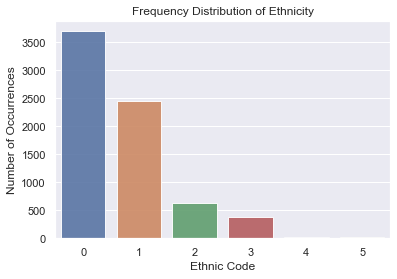

In [44]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
ethnicity_count = cat_compas['raceR'].value_counts()
sns.set(style="darkgrid")
sns.barplot(ethnicity_count.index, ethnicity_count.values, alpha=0.9)
plt.title('Frequency Distribution of Ethnicity')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ethnic Code', fontsize=12)
plt.show()

##If nothing else we can see that African Americans are arrested far more frequently than the other races classified in this dataset. 
##confirmed compared to raw data set

In [45]:
cat_compas_sklearn = cat_compas.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_compas_sklearn['Last'] = lb_make.fit_transform(cat_compas['Last'])

cat_compas_sklearn.head() #Results in appending a new column to df

,First,Last,compas_screening_date,r_offense_date,r_charge_desc,type_of_assessment,v_type_of_assessment,v_screening_date,sexR,age_catR,raceR,c_charge_degreeR,c_charge_descR,r_charge_degreeR,score_textR,v_score_textR
0,miguel,1658,8/14/2013,9/13/2013 9:19,9/13/2013 9:19,Risk of Recidivism,Risk of Violence,8/14/2013,0,2,3,1,5,5,0,0
1,kevon,1016,1/27/2013,7/5/2013,Felony Battery (Dom Strang),Risk of Recidivism,Risk of Violence,1/27/2013,0,1,0,1,5,5,0,0
2,ed,2844,4/14/2013,6/16/2013,Driving Under The Influence,Risk of Recidivism,Risk of Violence,4/14/2013,0,0,0,1,2,5,0,0
3,marcu,473,1/13/2013,9/13/2013 9:19,9/13/2013 9:19,Risk of Recidivism,Risk of Violence,1/13/2013,0,0,0,1,5,5,2,1
4,bouthy,2857,3/26/2013,9/13/2013 9:19,9/13/2013 9:19,Risk of Recidivism,Risk of Violence,3/26/2013,0,1,3,1,1,5,0,0


In [46]:
print(cat_compas['v_type_of_assessment'].value_counts())

Risk of Violence    7214
Name: v_type_of_assessment, dtype: int64


In [47]:
def typex (series): 
    if series == "Risk of Violence":
        return 0
cat_compas['v_type_of_assessmentR'] = cat_compas['v_type_of_assessment'].apply(typex)

In [48]:
def typx (series): 
    if series == "Risk of Recidivism":
        return 0
cat_compas['type_of_assessmentR'] = cat_compas['type_of_assessment'].apply(typx)

In [49]:
del cat_compas['type_of_assessment']
del cat_compas['v_type_of_assessment']

In [50]:
print(cat_compas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   First                  7214 non-null   object
 1   Last                   7214 non-null   object
 2   compas_screening_date  7214 non-null   object
 3   r_offense_date         7214 non-null   object
 4   r_charge_desc          7214 non-null   object
 5   v_screening_date       7214 non-null   object
 6   sexR                   7214 non-null   int64 
 7   age_catR               7214 non-null   int64 
 8   raceR                  7214 non-null   int64 
 9   c_charge_degreeR       7214 non-null   int64 
 10  c_charge_descR         7214 non-null   int64 
 11  r_charge_degreeR       7214 non-null   int64 
 12  score_textR            7214 non-null   int64 
 13  v_score_textR          7214 non-null   int64 
 14  v_type_of_assessmentR  7214 non-null   int64 
 15  type_of_assessmentR  

In [51]:
print(cat_compas['r_charge_desc'].value_counts())

9/13/2013 9:19                       3801
Driving License Suspended             258
Possess Cannabis/20 Grams Or Less     253
Resist/Obstruct W/O Violence          201
Battery                               192
                                     ... 
Trafficking 4-14 Grams Heroin           1
Kidnapping                              1
Use Lost Or Stolen Credit Card          1
Sell Methamphetamine                    1
Murder in 2nd Degree                    1
Name: r_charge_desc, Length: 341, dtype: int64


##r_charge_desc appears to be corrupted somehow with about half the entries set as the same date/time

In [52]:
del cat_compas['r_charge_desc']

In [53]:
print(cat_compas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   First                  7214 non-null   object
 1   Last                   7214 non-null   object
 2   compas_screening_date  7214 non-null   object
 3   r_offense_date         7214 non-null   object
 4   v_screening_date       7214 non-null   object
 5   sexR                   7214 non-null   int64 
 6   age_catR               7214 non-null   int64 
 7   raceR                  7214 non-null   int64 
 8   c_charge_degreeR       7214 non-null   int64 
 9   c_charge_descR         7214 non-null   int64 
 10  r_charge_degreeR       7214 non-null   int64 
 11  score_textR            7214 non-null   int64 
 12  v_score_textR          7214 non-null   int64 
 13  v_type_of_assessmentR  7214 non-null   int64 
 14  type_of_assessmentR    7214 non-null   int64 
dtypes: int64(10), object(

In [54]:
print(cat_compas_sklearn.dtypes)

First                    object
Last                      int32
compas_screening_date    object
r_offense_date           object
r_charge_desc            object
type_of_assessment       object
v_type_of_assessment     object
v_screening_date         object
sexR                      int64
age_catR                  int64
raceR                     int64
c_charge_degreeR          int64
c_charge_descR            int64
r_charge_degreeR          int64
score_textR               int64
v_score_textR             int64
dtype: object


In [55]:
print(cat_compas_sklearn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   First                  7214 non-null   object
 1   Last                   7214 non-null   int32 
 2   compas_screening_date  7214 non-null   object
 3   r_offense_date         7214 non-null   object
 4   r_charge_desc          7214 non-null   object
 5   type_of_assessment     7214 non-null   object
 6   v_type_of_assessment   7214 non-null   object
 7   v_screening_date       7214 non-null   object
 8   sexR                   7214 non-null   int64 
 9   age_catR               7214 non-null   int64 
 10  raceR                  7214 non-null   int64 
 11  c_charge_degreeR       7214 non-null   int64 
 12  c_charge_descR         7214 non-null   int64 
 13  r_charge_degreeR       7214 non-null   int64 
 14  score_textR            7214 non-null   int64 
 15  v_score_textR        

In [56]:
del cat_compas_sklearn['compas_screening_date']
del cat_compas_sklearn['r_offense_date']
del cat_compas_sklearn['v_screening_date']

In [57]:
print(cat_compas_sklearn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   First                 7214 non-null   object
 1   Last                  7214 non-null   int32 
 2   r_charge_desc         7214 non-null   object
 3   type_of_assessment    7214 non-null   object
 4   v_type_of_assessment  7214 non-null   object
 5   sexR                  7214 non-null   int64 
 6   age_catR              7214 non-null   int64 
 7   raceR                 7214 non-null   int64 
 8   c_charge_degreeR      7214 non-null   int64 
 9   c_charge_descR        7214 non-null   int64 
 10  r_charge_degreeR      7214 non-null   int64 
 11  score_textR           7214 non-null   int64 
 12  v_score_textR         7214 non-null   int64 
dtypes: int32(1), int64(8), object(4)
memory usage: 704.6+ KB
None


In [58]:
print(cat_compas_sklearn['v_type_of_assessment'].value_counts())

Risk of Violence    7214
Name: v_type_of_assessment, dtype: int64


In [59]:
print(cat_compas_sklearn['type_of_assessment'].value_counts())

Risk of Recidivism    7214
Name: type_of_assessment, dtype: int64


In [60]:
def typx (series): 
    if series == "Risk of Recidivism":
        return 0
cat_compas_sklearn['type_of_assessmentR'] = cat_compas_sklearn['type_of_assessment'].apply(typx)

In [61]:
def typex (series): 
    if series == "Risk of Violence":
        return 0
cat_compas_sklearn['v_type_of_assessmentR'] = cat_compas_sklearn['v_type_of_assessment'].apply(typex)

In [62]:
del cat_compas_sklearn['type_of_assessment']
del cat_compas_sklearn['v_type_of_assessment']

In [63]:
print(cat_compas_sklearn['r_charge_desc'].value_counts())

9/13/2013 9:19                       3801
Driving License Suspended             258
Possess Cannabis/20 Grams Or Less     253
Resist/Obstruct W/O Violence          201
Battery                               192
                                     ... 
Trafficking 4-14 Grams Heroin           1
Kidnapping                              1
Use Lost Or Stolen Credit Card          1
Sell Methamphetamine                    1
Murder in 2nd Degree                    1
Name: r_charge_desc, Length: 341, dtype: int64


In [64]:
del cat_compas_sklearn['r_charge_desc']

In [65]:
print(cat_compas_sklearn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   First                  7214 non-null   object
 1   Last                   7214 non-null   int32 
 2   sexR                   7214 non-null   int64 
 3   age_catR               7214 non-null   int64 
 4   raceR                  7214 non-null   int64 
 5   c_charge_degreeR       7214 non-null   int64 
 6   c_charge_descR         7214 non-null   int64 
 7   r_charge_degreeR       7214 non-null   int64 
 8   score_textR            7214 non-null   int64 
 9   v_score_textR          7214 non-null   int64 
 10  type_of_assessmentR    7214 non-null   int64 
 11  v_type_of_assessmentR  7214 non-null   int64 
dtypes: int32(1), int64(10), object(1)
memory usage: 648.3+ KB
None


In [66]:
cat_compas_sklearn['First'] = lb_make.fit_transform(cat_compas_sklearn['First'])

In [67]:
print(cat_compas_sklearn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   First                  7214 non-null   int32
 1   Last                   7214 non-null   int32
 2   sexR                   7214 non-null   int64
 3   age_catR               7214 non-null   int64
 4   raceR                  7214 non-null   int64
 5   c_charge_degreeR       7214 non-null   int64
 6   c_charge_descR         7214 non-null   int64
 7   r_charge_degreeR       7214 non-null   int64
 8   score_textR            7214 non-null   int64
 9   v_score_textR          7214 non-null   int64
 10  type_of_assessmentR    7214 non-null   int64
 11  v_type_of_assessmentR  7214 non-null   int64
dtypes: int32(2), int64(10)
memory usage: 620.1 KB
None


In [68]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from datetime import datetime
from datetime import date

In [69]:
cat_compas_sklearn.shape

(7214, 12)

In [70]:
cat_compas_sklearn.head()

,First,Last,sexR,age_catR,raceR,c_charge_degreeR,c_charge_descR,r_charge_degreeR,score_textR,v_score_textR,type_of_assessmentR,v_type_of_assessmentR
0,1816,1658,0,2,3,1,5,5,0,0,0,0
1,1448,1016,0,1,0,1,5,5,0,0,0,0
2,738,2844,0,0,0,1,2,5,0,0,0,0
3,1699,473,0,0,0,1,5,5,2,1,0,0
4,288,2857,0,1,3,1,1,5,0,0,0,0


Merge two_year dataset with cat_compas_sklearn

In [71]:
two_concat = pd.concat([two_year, cat_compas_sklearn], axis=1)

In [72]:
two_concat.head()

,id,name,First,Last,compas_screening_date,sex,DateOfBirth,age,age_cat,race,...,sexR,age_catR,raceR,c_charge_degreeR,c_charge_descR,r_charge_degreeR,score_textR,v_score_textR,type_of_assessmentR,v_type_of_assessmentR
0,1,miguel hernandez,miguel,hernandez,8/14/2013,Male,4/18/1947,69,Greater than 45,Other,...,0,2,3,1,5,5,0,0,0,0
1,3,kevon dixon,kevon,dixon,1/27/2013,Male,1/22/1982,34,25 - 45,African-American,...,0,1,0,1,5,5,0,0,0,0
2,4,ed philo,ed,philo,4/14/2013,Male,5/14/1991,24,Less than 25,African-American,...,0,0,0,1,2,5,0,0,0,0
3,5,marcu brown,marcu,brown,1/13/2013,Male,1/21/1993,23,Less than 25,African-American,...,0,0,0,1,5,5,2,1,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,3/26/2013,Male,1/22/1973,43,25 - 45,Other,...,0,1,3,1,1,5,0,0,0,0


In [73]:
print(two_concat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 65 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   First                    7214 non-null   object 
 3   Last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   DateOfBirth              7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

get rid of duplicate columns

In [74]:
del two_concat['name']
del two_concat['v_type_of_assessment']
del two_concat['type_of_assessment']
del two_concat['v_score_text']
del two_concat['score_text']
del two_concat['r_charge_degree']
del two_concat['race']
del two_concat['age_cat']
del two_concat['sex']

In [75]:
print(two_concat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   First                    7214 non-null   object 
 2   Last                     7214 non-null   object 
 3   compas_screening_date    7214 non-null   object 
 4   DateOfBirth              7214 non-null   object 
 5   age                      7214 non-null   int64  
 6   juv_fel_count            7214 non-null   int64  
 7   decile_score             7214 non-null   int64  
 8   juv_misd_count           7214 non-null   int64  
 9   juv_other_count          7214 non-null   int64  
 10  priors_count             7214 non-null   int64  
 11  days_b_screening_arrest  6907 non-null   float64
 12  c_jail_in                6907 non-null   object 
 13  c_jail_out               6907 non-null   object 
 14  c_case_number           

In [76]:
two_concat = two_concat.loc[:,~two_concat.columns.duplicated()]

In [77]:
print(two_concat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   First                    7214 non-null   object 
 2   Last                     7214 non-null   object 
 3   compas_screening_date    7214 non-null   object 
 4   DateOfBirth              7214 non-null   object 
 5   age                      7214 non-null   int64  
 6   juv_fel_count            7214 non-null   int64  
 7   decile_score             7214 non-null   int64  
 8   juv_misd_count           7214 non-null   int64  
 9   juv_other_count          7214 non-null   int64  
 10  priors_count             7214 non-null   int64  
 11  days_b_screening_arrest  6907 non-null   float64
 12  c_jail_in                6907 non-null   object 
 13  c_jail_out               6907 non-null   object 
 14  c_case_number           

In [78]:
del two_concat['compas_screening_date']
del two_concat['days_b_screening_arrest']
del two_concat['c_jail_in']
del two_concat['c_jail_out']
del two_concat['c_case_number']
del two_concat['c_offense_date']
del two_concat['c_arrest_date']
del two_concat['c_days_from_compas']
del two_concat['c_charge_degree']
del two_concat['c_charge_desc']
del two_concat['r_case_number']
del two_concat['r_days_from_arrest']
del two_concat['r_offense_date']
del two_concat['r_charge_desc']
del two_concat['r_jail_in']
del two_concat['r_jail_out']
del two_concat['screening_date']
del two_concat['v_screening_date']
del two_concat['DateOfBirth']

In [79]:
print(two_concat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7214 non-null   int64  
 1   First                  7214 non-null   object 
 2   Last                   7214 non-null   object 
 3   age                    7214 non-null   int64  
 4   juv_fel_count          7214 non-null   int64  
 5   decile_score           7214 non-null   int64  
 6   juv_misd_count         7214 non-null   int64  
 7   juv_other_count        7214 non-null   int64  
 8   priors_count           7214 non-null   int64  
 9   is_recid               7214 non-null   int64  
 10  violent_recid          0 non-null      float64
 11  is_violent_recid       7214 non-null   int64  
 12  vr_case_number         819 non-null    object 
 13  vr_charge_degree       819 non-null    object 
 14  vr_offense_date        819 non-null    object 
 15  vr_c

In [80]:
print(two_concat['vr_charge_degree'].value_counts())

(M1)     344
(F3)     228
(F2)     162
(F1)      38
(M2)      19
(F7)      18
(MO3)      5
(F6)       4
(F5)       1
Name: vr_charge_degree, dtype: int64


In [81]:
def vrchg (series): 
    if series == "M1":
        return 0
    if series == "F3":
        return 1
    if series == "F2":
        return 2
    if series == "F1":
        return 3
    if series == "M2":
        return 4
    if series == "F7":
        return 5
    else:
        return 6
two_concat['vr_charge_degreeR'] = two_concat['vr_charge_degree'].apply(vrchg)

In [82]:
print(two_concat['vr_charge_desc'].value_counts())

Battery                           329
Felony Battery (Dom Strang)        38
Battery on Law Enforc Officer      38
Aggravated Assault W/Dead Weap     37
Aggrav Battery w/Deadly Weapon     34
                                 ... 
Threaten Throw Destruct Device      1
Robbery W/Deadly Weapon             1
Aggrav Child Abuse-Causes Harm      1
Robbery Sudd Snatch w/Weapon        1
Manslaughter with Weapon            1
Name: vr_charge_desc, Length: 83, dtype: int64


In [83]:
def vrchgx (series): 
    if series == "Battery":
        return 0
    if series == "Battery on Law Enforc Officer":
        return 1
    if series == "Felony Battery (Dom Strang)":
        return 2
    if series == "Aggravated Assault W/Deadly Weapon":
        return 3
    else:
        return 4
two_concat['vr_charge_descR'] = two_concat['vr_charge_desc'].apply(vrchgx)

In [84]:
del two_concat['vr_charge_degree']
del two_concat['vr_charge_desc']
del two_concat['vr_offense_date']
del two_concat['vr_case_number']

In [85]:
print(two_concat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7214 non-null   int64  
 1   First                  7214 non-null   object 
 2   Last                   7214 non-null   object 
 3   age                    7214 non-null   int64  
 4   juv_fel_count          7214 non-null   int64  
 5   decile_score           7214 non-null   int64  
 6   juv_misd_count         7214 non-null   int64  
 7   juv_other_count        7214 non-null   int64  
 8   priors_count           7214 non-null   int64  
 9   is_recid               7214 non-null   int64  
 10  violent_recid          0 non-null      float64
 11  is_violent_recid       7214 non-null   int64  
 12  decile_score.1         7214 non-null   int64  
 13  v_decile_score         7214 non-null   int64  
 14  in_custody             6978 non-null   object 
 15  out_

In [86]:
del two_concat['in_custody']
del two_concat['out_custody']

In [87]:
print(two_concat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7214 non-null   int64  
 1   First                  7214 non-null   object 
 2   Last                   7214 non-null   object 
 3   age                    7214 non-null   int64  
 4   juv_fel_count          7214 non-null   int64  
 5   decile_score           7214 non-null   int64  
 6   juv_misd_count         7214 non-null   int64  
 7   juv_other_count        7214 non-null   int64  
 8   priors_count           7214 non-null   int64  
 9   is_recid               7214 non-null   int64  
 10  violent_recid          0 non-null      float64
 11  is_violent_recid       7214 non-null   int64  
 12  decile_score.1         7214 non-null   int64  
 13  v_decile_score         7214 non-null   int64  
 14  priors_count.1         7214 non-null   int64  
 15  star

In [88]:
del two_concat['violent_recid']

In [89]:
print(two_concat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     7214 non-null   int64 
 1   First                  7214 non-null   object
 2   Last                   7214 non-null   object
 3   age                    7214 non-null   int64 
 4   juv_fel_count          7214 non-null   int64 
 5   decile_score           7214 non-null   int64 
 6   juv_misd_count         7214 non-null   int64 
 7   juv_other_count        7214 non-null   int64 
 8   priors_count           7214 non-null   int64 
 9   is_recid               7214 non-null   int64 
 10  is_violent_recid       7214 non-null   int64 
 11  decile_score.1         7214 non-null   int64 
 12  v_decile_score         7214 non-null   int64 
 13  priors_count.1         7214 non-null   int64 
 14  start                  7214 non-null   int64 
 15  end                  

In [90]:
two_concat['First'] = lb_make.fit_transform(two_concat['First'])
two_concat['Last'] = lb_make.fit_transform(two_concat['Last'])

In [91]:
print(two_concat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   id                     7214 non-null   int64
 1   First                  7214 non-null   int32
 2   Last                   7214 non-null   int32
 3   age                    7214 non-null   int64
 4   juv_fel_count          7214 non-null   int64
 5   decile_score           7214 non-null   int64
 6   juv_misd_count         7214 non-null   int64
 7   juv_other_count        7214 non-null   int64
 8   priors_count           7214 non-null   int64
 9   is_recid               7214 non-null   int64
 10  is_violent_recid       7214 non-null   int64
 11  decile_score.1         7214 non-null   int64
 12  v_decile_score         7214 non-null   int64
 13  priors_count.1         7214 non-null   int64
 14  start                  7214 non-null   int64
 15  end                    7214 non-null  

In [92]:
print(two_concat['priors_count'].value_counts())

0     2150
1     1397
2      840
3      568
4      401
5      334
6      242
7      210
8      187
9      149
10     110
11      98
13      77
12      73
14      56
15      51
16      39
17      36
19      30
18      26
20      23
21      22
22      21
23      16
24      11
25       9
27       7
26       7
28       7
29       5
33       3
30       2
38       2
31       2
35       1
36       1
37       1
Name: priors_count, dtype: int64


## 37 priors. 37. 

In [93]:
print(two_concat['priors_count.1'].value_counts())

0     2150
1     1397
2      840
3      568
4      401
5      334
6      242
7      210
8      187
9      149
10     110
11      98
13      77
12      73
14      56
15      51
16      39
17      36
19      30
18      26
20      23
21      22
22      21
23      16
24      11
25       9
27       7
26       7
28       7
29       5
33       3
30       2
38       2
31       2
35       1
36       1
37       1
Name: priors_count.1, dtype: int64


In [94]:
del two_concat['priors_count.1']

In [95]:
del two_concat['decile_score.1']

In [96]:
print(two_concat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   id                     7214 non-null   int64
 1   First                  7214 non-null   int32
 2   Last                   7214 non-null   int32
 3   age                    7214 non-null   int64
 4   juv_fel_count          7214 non-null   int64
 5   decile_score           7214 non-null   int64
 6   juv_misd_count         7214 non-null   int64
 7   juv_other_count        7214 non-null   int64
 8   priors_count           7214 non-null   int64
 9   is_recid               7214 non-null   int64
 10  is_violent_recid       7214 non-null   int64
 11  v_decile_score         7214 non-null   int64
 12  start                  7214 non-null   int64
 13  end                    7214 non-null   int64
 14  event                  7214 non-null   int64
 15  two_year_recid         7214 non-null  

In [97]:
two_concat.head()

,id,First,Last,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_recid,...,raceR,c_charge_degreeR,c_charge_descR,r_charge_degreeR,score_textR,v_score_textR,type_of_assessmentR,v_type_of_assessmentR,vr_charge_degreeR,vr_charge_descR
0,1,1816,1658,69,0,1,0,0,0,0,...,3,1,5,5,0,0,0,0,6,4
1,3,1448,1016,34,0,3,0,0,0,1,...,0,1,5,5,0,0,0,0,6,2
2,4,738,2844,24,0,4,0,1,4,1,...,0,1,2,5,0,0,0,0,6,4
3,5,1699,473,23,0,8,1,0,1,0,...,0,1,5,5,2,1,0,0,6,4
4,6,288,2857,43,0,1,0,0,2,0,...,3,1,1,5,0,0,0,0,6,4


In [98]:
del two_concat['id']
del two_concat['v_decile_score']
del two_concat['is_violent_recid']
del two_concat['start']
del two_concat['end']
del two_concat['event']
del two_concat['two_year_recid']

In [99]:
print(two_concat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   First                  7214 non-null   int32
 1   Last                   7214 non-null   int32
 2   age                    7214 non-null   int64
 3   juv_fel_count          7214 non-null   int64
 4   decile_score           7214 non-null   int64
 5   juv_misd_count         7214 non-null   int64
 6   juv_other_count        7214 non-null   int64
 7   priors_count           7214 non-null   int64
 8   is_recid               7214 non-null   int64
 9   sexR                   7214 non-null   int64
 10  age_catR               7214 non-null   int64
 11  raceR                  7214 non-null   int64
 12  c_charge_degreeR       7214 non-null   int64
 13  c_charge_descR         7214 non-null   int64
 14  r_charge_degreeR       7214 non-null   int64
 15  score_textR            7214 non-null  

ALL DATA CONVERSIONS NEED TO BE DONE PRIOR TO THIS POINT


# Import train_test_split function
from sklearn.model_selection import train_test_split

x=two_concat[['First', 'Last', 'DateOfBirth', 'age', 'juv_fel_count', 'juv_misd_count', 
                 'juv_other_count', 'priors_count', 'is_recid', 'sexR', 'age_catR', 
                 'raceR', 'c_charge_degreeR','c_charge_descR', 'r_charge_degreeR', 
                 'score_textR', 'v_score_textR', 'type_of_assessmentR', 'v_type_of_assessmentR',
                 'vr_charge_degreeR', 'vr_charge_descR']]  # Features
y=two_concat['decile_score']  # Labels

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
# 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [100]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

In [101]:
x=two_concat[['First', 'Last', 'age', 'juv_fel_count', 'juv_misd_count', 
                 'juv_other_count', 'priors_count', 'is_recid', 'sexR', 'age_catR', 
                 'raceR', 'c_charge_degreeR','c_charge_descR', 'r_charge_degreeR', 
                 'score_textR', 'v_score_textR', 'type_of_assessmentR', 'v_type_of_assessmentR',
                 'vr_charge_degreeR', 'vr_charge_descR']]  # Features
y=two_concat['decile_score']  # Labels

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [103]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_train.shape)

(4328, 20) (4328,)
(2886, 20) (4328,)


In [104]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
predictions = lm.predict(x_test)
predictions

array([1.60913774, 2.29387721, 2.17037437, ..., 6.0522851 , 8.50431804,
       2.25351644])

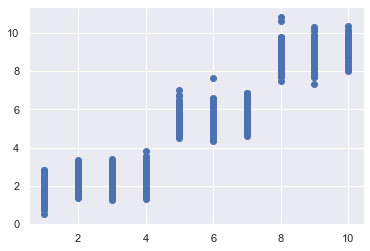

In [106]:
plt.scatter(y_test, predictions)

In [107]:
print("Score:", lm.score(x_test, y_test))

Score: 0.9009381473646367


##it looks like we've found a decent model based upon this accuracy score so let's press on

In [108]:
metrics.mean_absolute_error(y_test, predictions)

0.7636812589865818

In [109]:
metrics.mean_squared_error(y_test, predictions)

0.8145124196435025

In [110]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.9025034180785703

In [111]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [112]:
kfold = KFold(3, True, 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [   0    1    2 ... 7210 7211 7212], test: [   4    5   21 ... 7203 7209 7213]
train: [   0    2    4 ... 7209 7211 7213], test: [   1    3    6 ... 7208 7210 7212]
train: [   1    3    4 ... 7210 7212 7213], test: [   0    2    8 ... 7205 7207 7211]


In [113]:
print(cross_val_score(lm, x,y, cv=3))

[0.90071709 0.90039714 0.90491479]


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [115]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(two_concat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

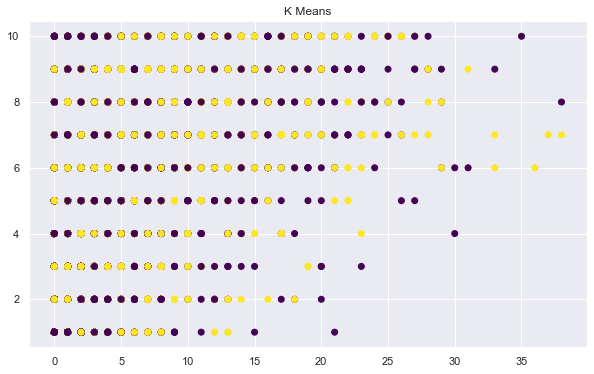

In [116]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(two_concat['priors_count'], two_concat['decile_score'], c=kmeans.labels_, cmap='viridis')

In [117]:
kmeans.labels_

array([0, 0, 1, ..., 0, 0, 1])

In [118]:
two_concat['Group'] = kmeans.labels_

In [119]:
kmeans.cluster_centers_

array([[1.34811625e+03, 1.08272173e+03, 3.47826550e+01, 6.46448524e-02,
        4.47193403e+00, 8.45969673e-02, 1.14658154e-01, 3.45171588e+00,
        4.76722533e-01, 1.98989093e-01, 1.00665070e+00, 6.80500133e-01,
        6.43522213e-01, 3.20830008e+00, 5.00000000e+00, 6.48310721e-01,
        4.38946528e-01, 0.00000000e+00, 0.00000000e+00, 6.00000000e+00,
        3.79063581e+00],
       [1.36252069e+03, 3.04563097e+03, 3.48564399e+01, 7.00434153e-02,
        4.55050651e+00, 9.78292330e-02, 1.03617945e-01, 3.49493488e+00,
        4.85962373e-01, 1.87264834e-01, 1.00636758e+00, 7.29088278e-01,
        6.50361795e-01, 3.24457308e+00, 5.00000000e+00, 6.60781476e-01,
        4.39073806e-01, 0.00000000e+00, 0.00000000e+00, 6.00000000e+00,
        3.79189580e+00]])

In [120]:
kmeans.inertia_

6925725701.486415

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [122]:
scaler = StandardScaler()
scaler.fit(two_concat.drop('decile_score', axis=1))
scaledVariables = scaler.transform(two_concat.drop('decile_score',axis=1))
compas_scaled = pd.DataFrame(scaledVariables, columns=two_concat.columns[:-1])

In [123]:
x = compas_scaled
y = two_concat['decile_score']

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [125]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [126]:
print(confusion_matrix(y_test, pred))

[[249  99  49  38   0   3   0   0   0   0]
 [ 83  71  62  44   3   3   1   0   0   0]
 [ 59  65  46  52   3   2   1   0   0   0]
 [ 31  49  63  61   5   9   5   1   0   0]
 [ 10   7   6   8  75  53  50   4   4   1]
 [  1   6   4   4  61  58  30   5   9   1]
 [  3   4   2  10  38  34  59   9  16   3]
 [  0   0   0   0  12   9  13  63  41  25]
 [  0   0   0   0  11   9  19  49  39  30]
 [  0   0   0   0   5   5   9  22  30  42]]


In [127]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.57      0.57      0.57       438
           2       0.24      0.27      0.25       267
           3       0.20      0.20      0.20       228
           4       0.28      0.27      0.28       224
           5       0.35      0.34      0.35       218
           6       0.31      0.32      0.32       179
           7       0.32      0.33      0.32       178
           8       0.41      0.39      0.40       163
           9       0.28      0.25      0.26       157
          10       0.41      0.37      0.39       113

    accuracy                           0.35      2165
   macro avg       0.34      0.33      0.33      2165
weighted avg       0.35      0.35      0.35      2165



In [128]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

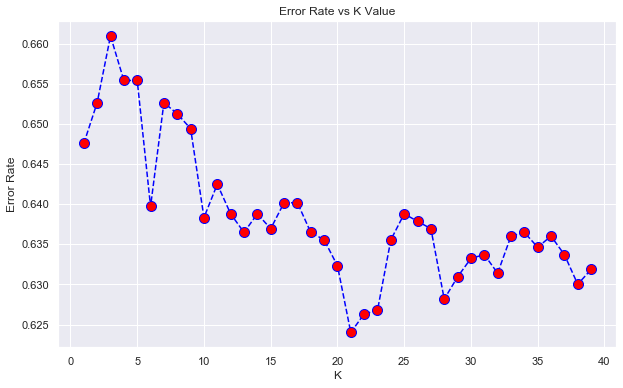

In [129]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [130]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [132]:
x = two_concat.drop('decile_score', axis=1)
y = two_concat['decile_score']

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

In [134]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=76, splitter='best')

In [135]:
treePredictions = decisionTree.predict(x_test)

In [136]:
print(confusion_matrix(y_test, treePredictions))

[[268  66  53  36   0   0   0   0   0   0]
 [ 88  90  67  51   0   0   0   0   0   0]
 [ 40  67  65  52   0   0   0   0   0   0]
 [ 29  48  56  84   0   0   0   0   0   0]
 [  0   0   0   0  74  70  61   0   0   0]
 [  0   0   0   0  68  64  57   0   0   0]
 [  0   0   0   0  46  69  72   0   0   0]
 [  0   0   0   0   0   0   0  75  43  28]
 [  0   0   0   0   0   0   0  41  60  43]
 [  0   0   0   0   0   0   0  35  62  37]]


In [137]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

           1       0.63      0.63      0.63       423
           2       0.33      0.30      0.32       296
           3       0.27      0.29      0.28       224
           4       0.38      0.39      0.38       217
           5       0.39      0.36      0.38       205
           6       0.32      0.34      0.33       189
           7       0.38      0.39      0.38       187
           8       0.50      0.51      0.51       146
           9       0.36      0.42      0.39       144
          10       0.34      0.28      0.31       134

    accuracy                           0.41      2165
   macro avg       0.39      0.39      0.39      2165
weighted avg       0.41      0.41      0.41      2165



##Not a particularly reliable model but it is improved

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

In [139]:
x = two_concat.drop('decile_score', axis=1)
y = two_concat['decile_score']

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

In [141]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=76, verbose=0,
                       warm_start=False)

In [142]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[352  43  14  14   0   0   0   0   0   0]
 [115 102  42  37   0   0   0   0   0   0]
 [ 56  63  53  52   0   0   0   0   0   0]
 [ 36  49  38  94   0   0   0   0   0   0]
 [  0   0   0   0  90  68  47   0   0   0]
 [  0   0   0   0  72  63  54   0   0   0]
 [  0   0   0   0  61  56  70   0   0   0]
 [  0   0   0   0   0   0   0  76  52  18]
 [  0   0   0   0   0   0   0  49  65  30]
 [  0   0   0   0   0   0   0  36  48  50]]
              precision    recall  f1-score   support

           1       0.63      0.83      0.72       423
           2       0.40      0.34      0.37       296
           3       0.36      0.24      0.29       224
           4       0.48      0.43      0.45       217
           5       0.40      0.44      0.42       205
           6       0.34      0.33      0.34       189
           7       0.41      0.37      0.39       187
           8       0.47      0.52      0.50       146
           9       0.39      0.45      0.42       144
          10       0.51     

##Still not good but improved some more

In [144]:
pip install pgmpy==0.1.9

Note: you may need to restart the kernel to use updated packages.


In [145]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [143]:
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

ModuleNotFoundError: No module named 'torch'

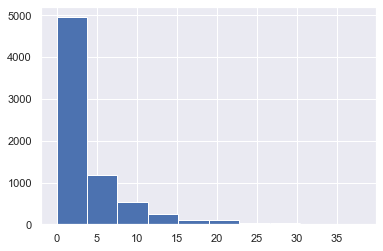

In [144]:
two_concat.priors_count.hist()

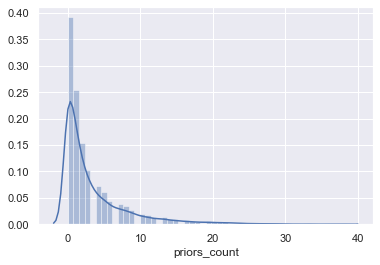

In [145]:
sns.distplot(two_concat['priors_count'])

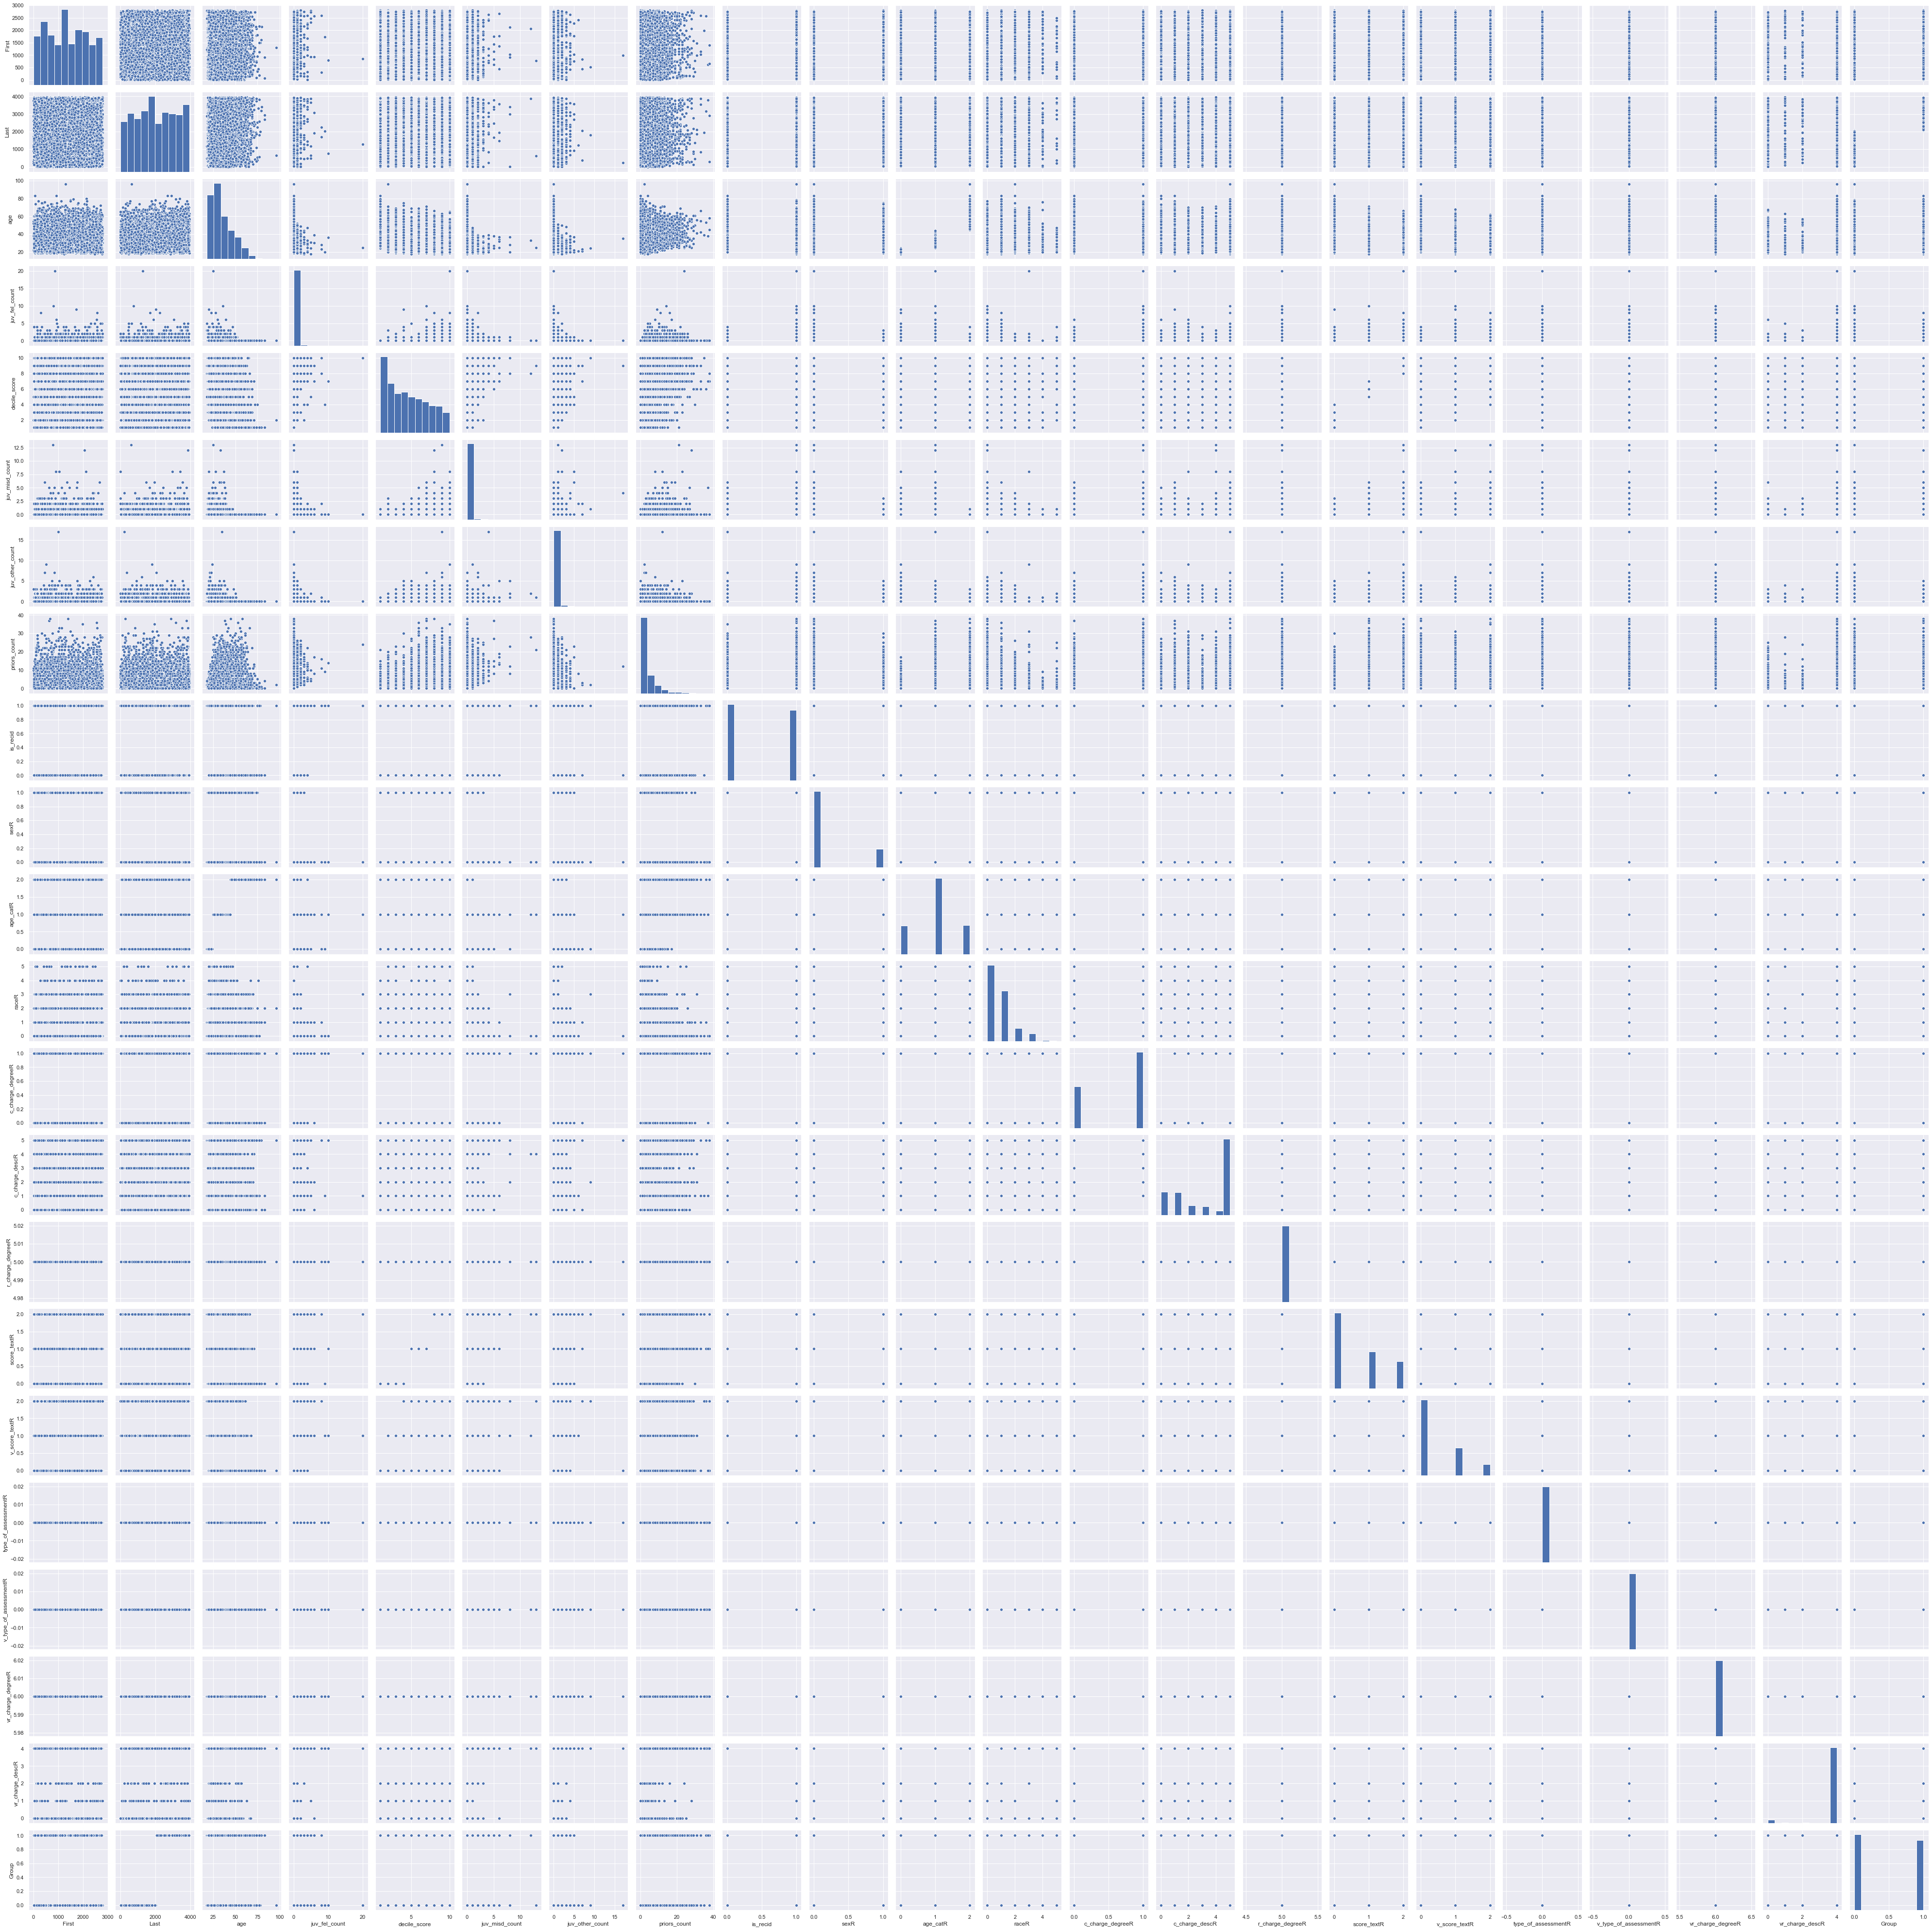

In [146]:
sns.pairplot(two_concat)

In [147]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [148]:
num_bins = 5

Text(0.5, 0, 'priors_count')

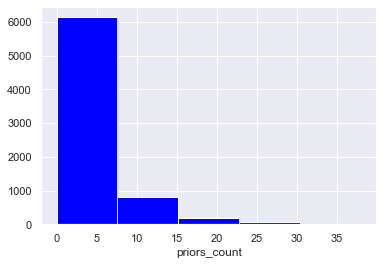

In [151]:
n, bins, patches = plt.hist(two_concat['priors_count'], num_bins, facecolor='blue')
plt.xlabel('priors_count')

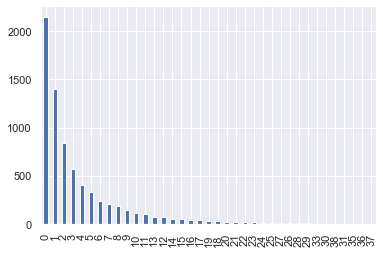

In [155]:
two_concat['priors_count'].value_counts().plot(kind='bar')

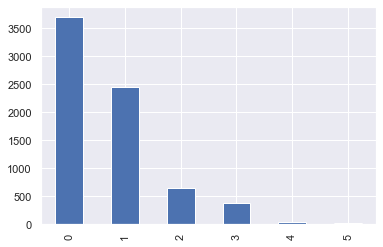

In [156]:
two_concat['raceR'].value_counts().plot(kind='bar')

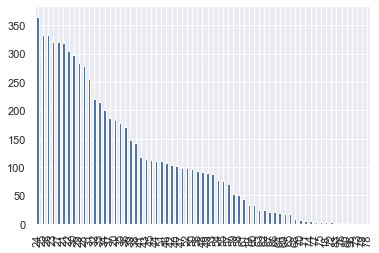

In [157]:
two_concat['age'].value_counts().plot(kind='bar')

In [158]:
print(two_concat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   First                  7214 non-null   int32
 1   Last                   7214 non-null   int32
 2   age                    7214 non-null   int64
 3   juv_fel_count          7214 non-null   int64
 4   decile_score           7214 non-null   int64
 5   juv_misd_count         7214 non-null   int64
 6   juv_other_count        7214 non-null   int64
 7   priors_count           7214 non-null   int64
 8   is_recid               7214 non-null   int64
 9   sexR                   7214 non-null   int64
 10  age_catR               7214 non-null   int64
 11  raceR                  7214 non-null   int64
 12  c_charge_degreeR       7214 non-null   int64
 13  c_charge_descR         7214 non-null   int64
 14  r_charge_degreeR       7214 non-null   int64
 15  score_textR            7214 non-null  

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

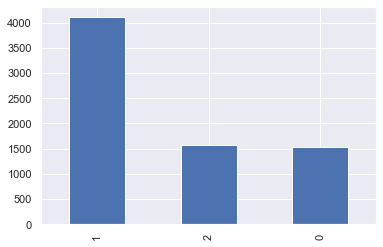

In [162]:
two_concat['age_catR'].value_counts().plot(kind='bar')
age_freq = two_concat['age_catR'].value_counts().plot('bar')
SalaryFreq.set_title("Age Category Frequency")
SalaryFreq.set_xlabel("Age Categories")
SalaryFreq.set_ylabel("Frequency")

In [161]:
two_concat.to_csv(r'C:\Users\sjaco\OneDrive\Desktop\final project\two_concat.csv')

In [250]:
print(two_concat.dtypes)

First                             int32
Last                              int32
DateOfBirth              datetime64[ns]
age                               int64
juv_fel_count                     int64
decile_score                      int64
juv_misd_count                    int64
juv_other_count                   int64
priors_count                      int64
is_recid                          int64
sexR                              int64
age_catR                          int64
raceR                             int64
c_charge_degreeR                  int64
c_charge_descR                    int64
r_charge_degreeR                  int64
score_textR                       int64
v_score_textR                     int64
type_of_assessmentR               int64
v_type_of_assessmentR             int64
vr_charge_degreeR                 int64
vr_charge_descR                   int64
dtype: object


In [251]:
two_concat.head()

,First,Last,DateOfBirth,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_recid,...,raceR,c_charge_degreeR,c_charge_descR,r_charge_degreeR,score_textR,v_score_textR,type_of_assessmentR,v_type_of_assessmentR,vr_charge_degreeR,vr_charge_descR
0,1816,1658,1947-04-18,69,0,1,0,0,0,0,...,3,1,5,5,0,0,0,0,6,4
1,1448,1016,1982-01-22,34,0,3,0,0,0,1,...,0,1,5,5,0,0,0,0,6,2
2,738,2844,1991-05-14,24,0,4,0,1,4,1,...,0,1,2,5,0,0,0,0,6,4
3,1699,473,1993-01-21,23,0,8,1,0,1,0,...,0,1,5,5,2,1,0,0,6,4
4,288,2857,1973-01-22,43,0,1,0,0,2,0,...,3,1,1,5,0,0,0,0,6,4


In [252]:
len(two_concat[pd.isnull(two_concat.First)])

0

In [253]:
len(two_concat[pd.isnull(two_concat.Last)])

0

In [254]:
len(two_concat[pd.isnull(two_concat.DateOfBirth)])

0

In [255]:
len(two_concat[pd.isnull(two_concat.age)])

0

In [256]:
len(two_concat[pd.isnull(two_concat.juv_fel_count)])

0

In [257]:
len(two_concat[pd.isnull(two_concat.decile_score)])

0

In [258]:
len(two_concat[pd.isnull(two_concat.juv_misd_count)])

0

In [259]:
len(two_concat[pd.isnull(two_concat.juv_other_count)])

0

In [260]:
len(two_concat[pd.isnull(two_concat.priors_count)])

0

In [261]:
len(two_concat[pd.isnull(two_concat.is_recid)])

0

In [262]:
len(two_concat[pd.isnull(two_concat.sexR)])

0

In [263]:
len(two_concat[pd.isnull(two_concat.age_catR)])

0

In [264]:
len(two_concat[pd.isnull(two_concat.raceR)])

0

In [265]:
len(two_concat[pd.isnull(two_concat.c_charge_degreeR)])

0

In [266]:
len(two_concat[pd.isnull(two_concat.c_charge_descR)])

0

In [267]:
len(two_concat[pd.isnull(two_concat.r_charge_degreeR)])

0

In [268]:
len(two_concat[pd.isnull(two_concat.score_textR)])

0

In [269]:
len(two_concat[pd.isnull(two_concat.v_score_textR)])

0

In [270]:
len(two_concat[pd.isnull(two_concat.type_of_assessmentR)])

0

In [271]:
len(two_concat[pd.isnull(two_concat.v_type_of_assessmentR)])

0

In [272]:
len(two_concat[pd.isnull(two_concat.vr_charge_degreeR)])

0

In [273]:
len(two_concat[pd.isnull(two_concat.vr_charge_descR)])

0

In [274]:
del two_concat['DateOfBirth']

In [275]:
print(two_concat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   First                  7214 non-null   int32
 1   Last                   7214 non-null   int32
 2   age                    7214 non-null   int64
 3   juv_fel_count          7214 non-null   int64
 4   decile_score           7214 non-null   int64
 5   juv_misd_count         7214 non-null   int64
 6   juv_other_count        7214 non-null   int64
 7   priors_count           7214 non-null   int64
 8   is_recid               7214 non-null   int64
 9   sexR                   7214 non-null   int64
 10  age_catR               7214 non-null   int64
 11  raceR                  7214 non-null   int64
 12  c_charge_degreeR       7214 non-null   int64
 13  c_charge_descR         7214 non-null   int64
 14  r_charge_degreeR       7214 non-null   int64
 15  score_textR            7214 non-null  

In [276]:
lm = LinearRegression()
lm.fit(x_train, y_train)

TypeError: invalid type promotion